In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arjun626","key":"86b93622ecb3ae8fb81b310f604cbaae"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions
!kaggle datasets download -d swarupsudulaganti/uk-house-price-prediction-dataset-2015-to-2024




Dataset URL: https://www.kaggle.com/datasets/swarupsudulaganti/uk-house-price-prediction-dataset-2015-to-2024
License(s): CC0-1.0


In [4]:
!unzip uk-house-price-prediction-dataset-2015-to-2024.zip

Archive:  uk-house-price-prediction-dataset-2015-to-2024.zip
  inflating: UK_House_Price_Prediction_dataset_2015_to_2024.csv  


In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
pf=pd.read_csv("UK_House_Price_Prediction_dataset_2015_to_2024.csv")

In [7]:
pf.shape

(90000, 11)

In [8]:
pf.drop_duplicates(inplace=True)

In [9]:
pf.shape

(89957, 11)

In [10]:
pf.head(3)

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
0,735000,2017-08-07,LE17 5AP,D,N,F,CLAYBROOKE COURT,CLAYBROOKE PARVA,LUTTERWORTH,HARBOROUGH,LEICESTERSHIRE
1,160000,2023-02-03,SA11 4BD,T,N,F,GORED COTTAGES,MELINCOURT,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
2,176500,2015-01-06,ME3 0DQ,S,N,F,GREEN LANE,ISLE OF GRAIN,ROCHESTER,MEDWAY,MEDWAY


In [11]:

pf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89957 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          89957 non-null  int64 
 1   date           89957 non-null  object
 2   postcode       89957 non-null  object
 3   property_type  89957 non-null  object
 4   new_build      89957 non-null  object
 5   freehold       89957 non-null  object
 6   street         89957 non-null  object
 7   locality       89957 non-null  object
 8   town           89957 non-null  object
 9   district       89957 non-null  object
 10  county         89957 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.3+ MB


In [12]:
# Convert 'date' to datetime format
pf['date'] = pd.to_datetime(pf['date'])

# Extract 'year' and 'month' from 'date'
pf['year'] = pf['date'].dt.year
pf['month'] = pf['date'].dt.month

# Drop the original 'date' column
pf.drop('date', axis=1, inplace=True)

In [13]:
pf.head(3)

,price,postcode,property_type,new_build,freehold,street,locality,town,district,county,year,month
0,735000,LE17 5AP,D,N,F,CLAYBROOKE COURT,CLAYBROOKE PARVA,LUTTERWORTH,HARBOROUGH,LEICESTERSHIRE,2017,8
1,160000,SA11 4BD,T,N,F,GORED COTTAGES,MELINCOURT,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,2023,2
2,176500,ME3 0DQ,S,N,F,GREEN LANE,ISLE OF GRAIN,ROCHESTER,MEDWAY,MEDWAY,2015,1


In [14]:
pf.isna().sum()

,0
price,0
postcode,0
property_type,0
new_build,0
freehold,0
street,0
locality,0
town,0
district,0
county,0


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['postcode', 'property_type', 'new_build', 'freehold',
                    'street', 'locality', 'town', 'district', 'county']

# Encode categorical columns
for col in categorical_cols:
    pf[col] = le.fit_transform(pf[col])

In [16]:
pf.head(3)

,price,postcode,property_type,new_build,freehold,street,locality,town,district,county,year,month
0,735000,30844,0,0,0,8382,1929,511,136,54,2017,8
1,160000,58602,4,0,0,15902,5815,574,192,63,2023,2
2,176500,37621,3,0,0,16311,4665,687,180,57,2015,1


In [17]:
# Define the target variable 'price' and features 'X'
X = pf.drop('price', axis=1)
y = pf['price']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''
# Display the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (71965, 11)
X_test shape: (17992, 11)


In [21]:
# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

In [26]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 175895.77
Mean Squared Error (MSE): 5996600076966.42
Root Mean Squared Error (RMSE): 2448795.64
R-squared (R²): 0.0011


In [31]:
new_data = [[30844, 1, 0, 0, 15902, 4665, 511, 192, 57, 2017, 1]]  # Removed the extra feature (850000)
sample_prediction = model.predict(new_data)
print(f"Single Prediction: ₹{sample_prediction[0]:,.2f}")

Single Prediction: ₹362,116.96


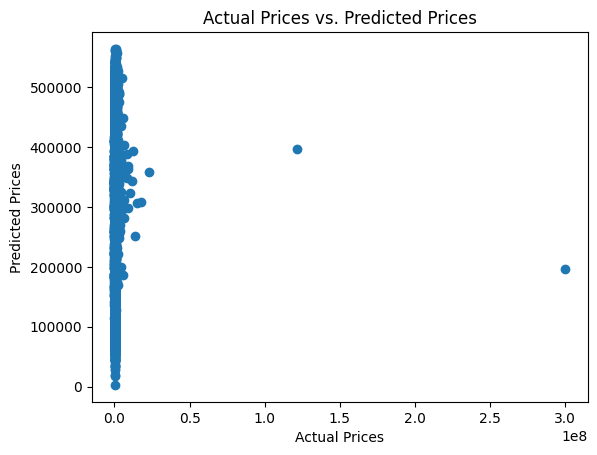

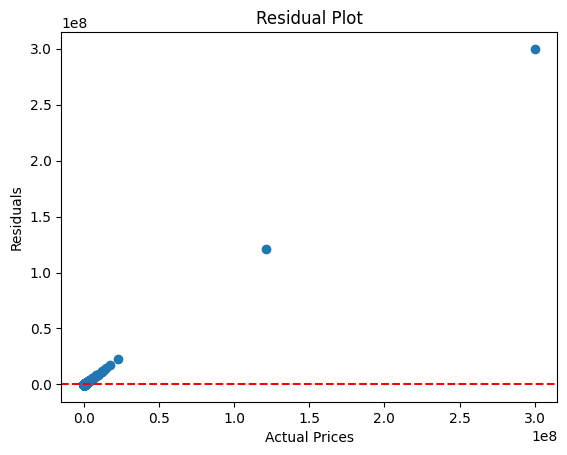

In [34]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

